# Index

# Executive Summary

This analysis investigates wether  The primary goal is to identify key factors that contribute to a film's financial success. By exploring a wide range of variables, including production budgets, box office performance, genre, director influence, cast popularity, and release dates, this report seeks to provide a comprehensive understanding of movie profitability.

The analysis includes the following key sections:

**Data Preparation and Cleaning:** The dataset was preprocessed to handle missing data, renaming columns, and dropping some values that make no sense in our analysis.

**Exploratory Data Analysis (EDA):** A detailed examination of the dataset was conducted to uncover relationships between variables. Initial findings show that genre and star power are significant predictors of box office success. Additionally, production budgets and release windows strongly correlate with profitability.

Profitability Metrics: We computed the return on investment (ROI) for each movie in the dataset, allowing for a comparison between films of varying budgets. This revealed trends where smaller-budget films in specific genres (e.g., horror and thriller) often yielded higher percentage returns compared to blockbuster releases.

Modeling and Prediction: Using regression analysis, machine learning models were trained to predict movie profitability based on the available data. Key factors influencing success were identified, including critical acclaim, marketing budgets, and franchise presence.

Conclusions and Recommendations: The analysis highlights several actionable insights for film studios, producers, and investors, including the importance of strategic timing, effective marketing campaigns, and leveraging established talent to maximize profits.

This report serves as a valuable tool for stakeholders in the entertainment industry, providing a data-driven approach to decision-making in film production and distribution.

# Introduciton

In this data analysis, we utilized this dataset from Kaggle: https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset , which provides comprehensive information about movies: 

names: english title of the movie

date_x: release date of the movie between 14.05.1903 and 31.12.2023 

score: rating based on user experiences in a score of 0-100

genre: genre of the movie (e.g. comedy or drama)

overview: short description of the movie

crew: all persons who were part of the movie team (cast and crew)

orig_title: original title in their original languages

status: released or postproduction (100% released)

orig_lang: originally reased in this language

budget_x: movie budget

revenue: revenue generated worldwide

country: movie’s country of origin

Based on this dataset, we formulated two primary research questions.

The first question is: **Is the IMDB score for a movie really not dependent on its production budget?** To test this, we developed the - null hypothesis $H_0 : \beta_1 \gt 0$ and the alternative hypothesis $H_1 : \beta_1 \leq 0$. We apply a linear regression model to examine this question.

The second research question is: **Does the movie profitability depend on the IMDb score?** For this, our null hypothesis $H_0 : \beta_1 = 0$ and the alternative hypothesis $H_1 : \beta_1 \neq 0$. To test this, we use a logistic regression model, analyzing the extent to which a movie’s IMDB rating impacts its chances of being financially successful.


# Exploratory data analysis 

## Library and data import

In [1]:
#pietro
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

#jenna
import statsmodels.formula.api as smf

#edo
from sklearn.preprocessing import MultiLabelBinarizer

In [2]:
file_path = 'imdb_movies.csv'
#Try loading the CSV file with a different encoding
imdb_movies = pd.read_csv(file_path)

#Display the first few rows of the dataframe
imdb_movies.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


## Datatypes & data cleaning

We begin by inspecting the dataset to understand the key variables and the data types we are facing, check for missing data, and get a sense of the overall structure

In [3]:
#checking the data types
imdb_movies.dtypes

names          object
date_x         object
score         float64
genre          object
overview       object
crew           object
orig_title     object
status         object
orig_lang      object
budget_x      float64
revenue       float64
country        object
dtype: object

In [4]:
#converting the variable date_x fro object to datetime type
imdb_movies["date_x"]= pd.to_datetime(imdb_movies["date_x"])
imdb_movies.dtypes

names                 object
date_x        datetime64[ns]
score                float64
genre                 object
overview              object
crew                  object
orig_title            object
status                object
orig_lang             object
budget_x             float64
revenue              float64
country               object
dtype: object

In [5]:
#checking the number of missing values
imdb_movies.isna().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

In [6]:
#dropping the missing values and resetting the index
imdb_movies.dropna(inplace=True)
imdb_movies.reset_index(drop = True, inplace = True)
imdb_movies.isna().sum()

names         0
date_x        0
score         0
genre         0
overview      0
crew          0
orig_title    0
status        0
orig_lang     0
budget_x      0
revenue       0
country       0
dtype: int64

In [7]:
#check for duplicates 
print(imdb_movies.duplicated().sum())

0


No duplicates, so there is no need to drop more rows for now

In [8]:
#renaming the date and budget column with a more clear name
imdb_movies.rename(columns={'date_x': 'release_date',
                            'budget_x': 'budget'},
                            inplace=True)

In [9]:
#creating the variable profitable subtracting budget from revenue
imdb_movies['profitable'] = (imdb_movies['revenue'] > imdb_movies['budget']).apply(lambda x: int(x))
imdb_movies.head()

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,profitable
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,1
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,1
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,1
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,1
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,1


In [10]:
imdb_movies.describe()

,release_date,score,budget,revenue,profitable
count,10052,10052.00000,1.005200e+04,1.005200e+04,10052.000000
mean,2008-06-07 16:17:25.762037504,63.82700,6.412528e+07,2.512049e+08,0.802129
min,1903-05-15 00:00:00,0.00000,1.000000e+00,0.000000e+00,0.000000
25%,2002-01-08 06:00:00,59.00000,1.439763e+07,2.768781e+07,1.000000
50%,2013-04-10 00:00:00,65.00000,5.000000e+07,1.493288e+08,1.000000
75%,2019-09-26 00:00:00,71.00000,1.040000e+08,4.161578e+08,1.000000
max,2023-12-31 00:00:00,100.00000,4.600000e+08,2.923706e+09,1.000000
std,NaN,12.78271,5.665852e+07,2.765495e+08,0.398414


looking the minimum values of our variables:
- score = 0 has no significance for our analysis, 
- budget < 1000 we will assume that is a problem of data qulity, therefore we drop these values
- revenue < 1000 we make the same assumption as for budget

In [11]:
#printing the count of values that are below a certain threshold
print(imdb_movies[imdb_movies['score'] == 0].count())
print(imdb_movies[imdb_movies['revenue'] < 1000].count())
print(imdb_movies[imdb_movies['budget'] < 1000].count())


names           163
release_date    163
score           163
genre           163
overview        163
crew            163
orig_title      163
status          163
orig_lang       163
budget          163
revenue         163
country         163
profitable      163
dtype: int64
names           85
release_date    85
score           85
genre           85
overview        85
crew            85
orig_title      85
status          85
orig_lang       85
budget          85
revenue         85
country         85
profitable      85
dtype: int64
names           19
release_date    19
score           19
genre           19
overview        19
crew            19
orig_title      19
status          19
orig_lang       19
budget          19
revenue         19
country         19
profitable      19
dtype: int64


In [12]:
#dropping rows with critical values 
imdb_movies = imdb_movies[imdb_movies.score != 0]
imdb_movies = imdb_movies[imdb_movies.revenue >= 1000]
imdb_movies = imdb_movies[imdb_movies.budget >= 1000]
imdb_movies.reset_index(drop = True, inplace = True)
imdb_movies.describe()

,release_date,score,budget,revenue,profitable
count,9793,9793.000000,9.793000e+03,9.793000e+03,9793.000000
mean,2008-03-16 13:10:56.918206976,64.889717,6.243951e+07,2.551389e+08,0.817421
min,1903-05-15 00:00:00,10.000000,2.000000e+03,1.242000e+03,0.000000
25%,2001-10-19 00:00:00,60.000000,1.450000e+07,2.892019e+07,1.000000
50%,2012-12-06 00:00:00,66.000000,5.000000e+07,1.470804e+08,1.000000
75%,2019-06-28 00:00:00,72.000000,1.020000e+08,4.257325e+08,1.000000
max,2023-12-31 00:00:00,100.000000,4.600000e+08,2.923706e+09,1.000000
std,NaN,9.884499,5.421382e+07,2.787525e+08,0.386341


We dropped 259 rows out of the original 10,052

## Variable analysis

### General anlaysis

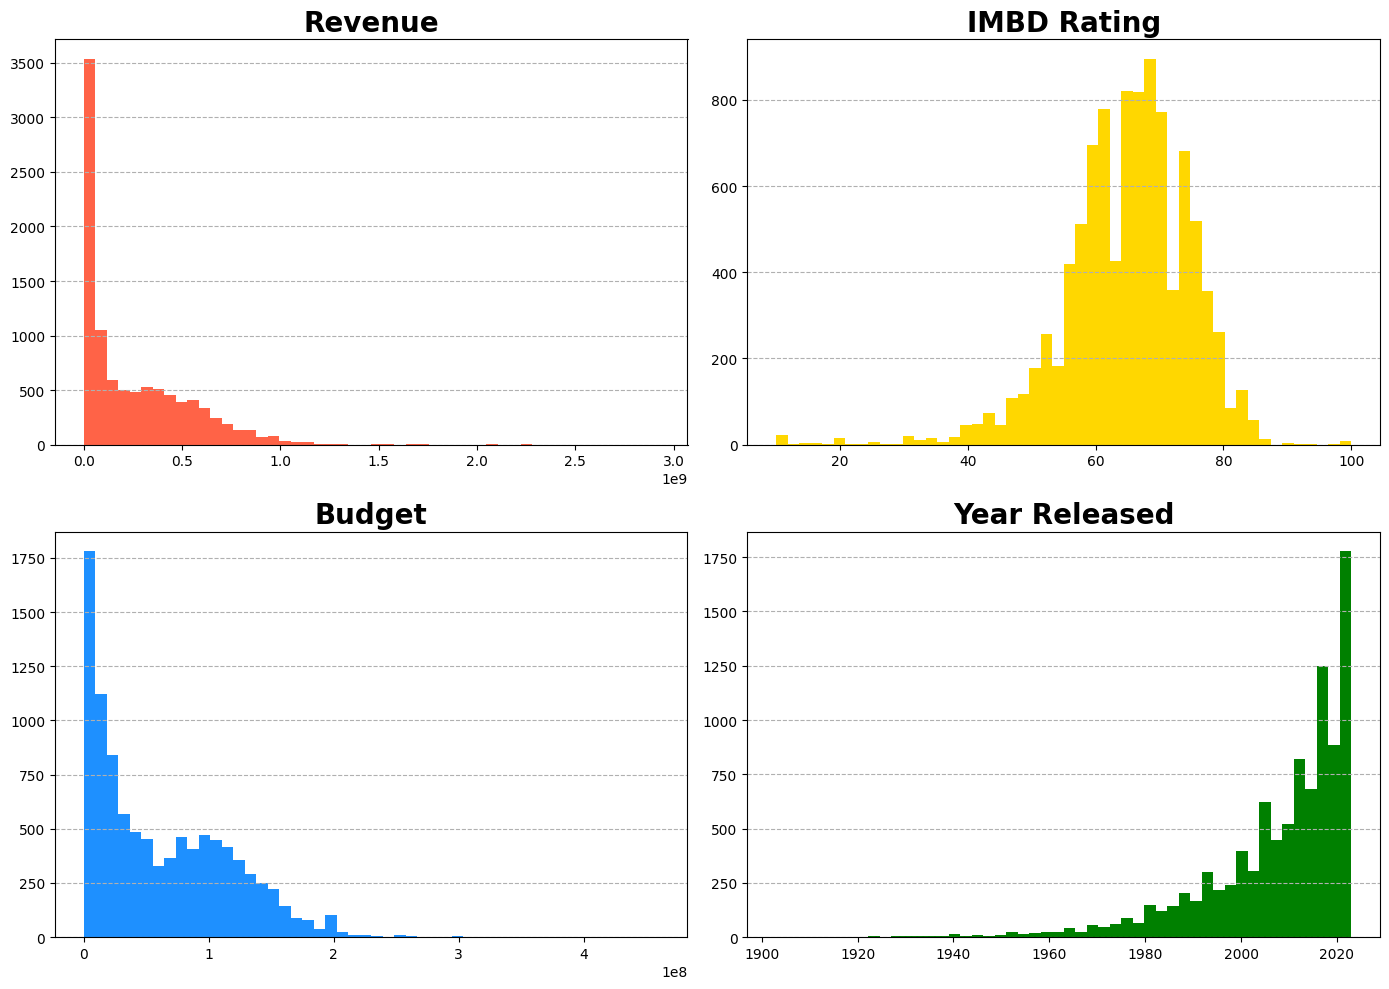

In [13]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(14, 10))
his1= imdb_movies['score']
his2= imdb_movies['budget']
his3= imdb_movies['revenue']
his4= imdb_movies['release_date'].dt.year

#revenue
axes[0,0].hist(his3, bins=50, color='tomato')
axes[0,0].set_title('Revenue', fontsize=20, fontweight='bold')
axes[0,0].grid(axis='y', linestyle='--')

#score
axes[0,1].hist(his1, bins=50, color='gold')
axes[0,1].set_title('IMBD Rating', fontsize=20, fontweight='bold')
axes[0,1].grid(axis='y', linestyle='--')

#budget
axes[1,0].hist(his2, bins=50, color='dodgerblue')
axes[1,0].set_title('Budget', fontsize=20, fontweight='bold')
axes[1,0].grid(axis='y', linestyle='--')

#release_year
axes[1,1].hist(his4, bins=50, color='green')
axes[1,1].set_title('Year Released', fontsize=20, fontweight='bold')
axes[1,1].grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

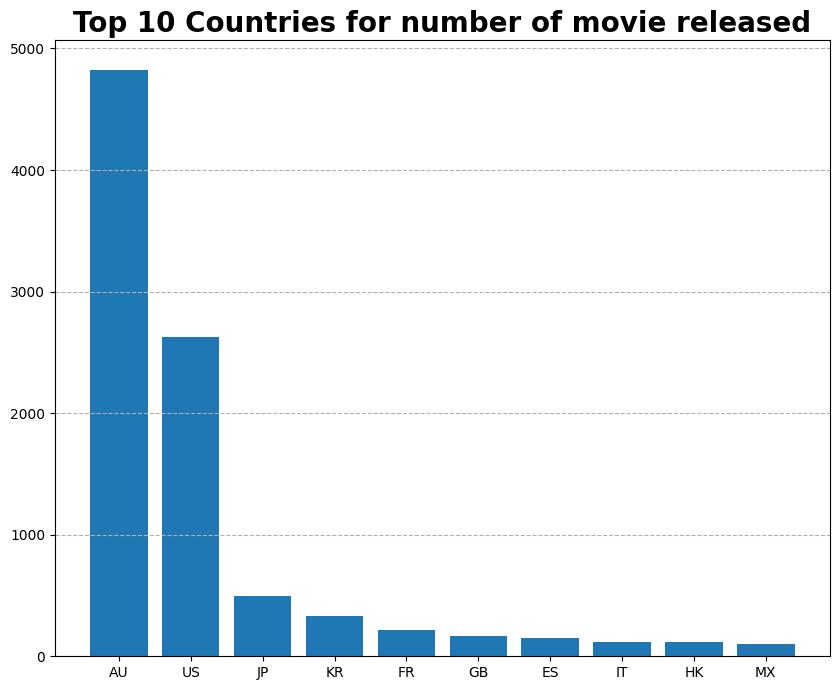

In [14]:
top_countries = imdb_movies["country"].value_counts().head(10)
plt.figure(figsize=(10,8))
plt.bar(top_countries.index, top_countries)
plt.title('Top 10 Countries for number of movie released', fontsize=20, fontweight='bold')
plt.grid(axis='y', linestyle='--')
plt.show()

/var/folders/5x/yxh7qcrx4_x9ndr4nj2gddzc0000gn/T/ipykernel_16663/578401133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genres['genre'] = imdb_genres['genre'].str.split(r',\s*')


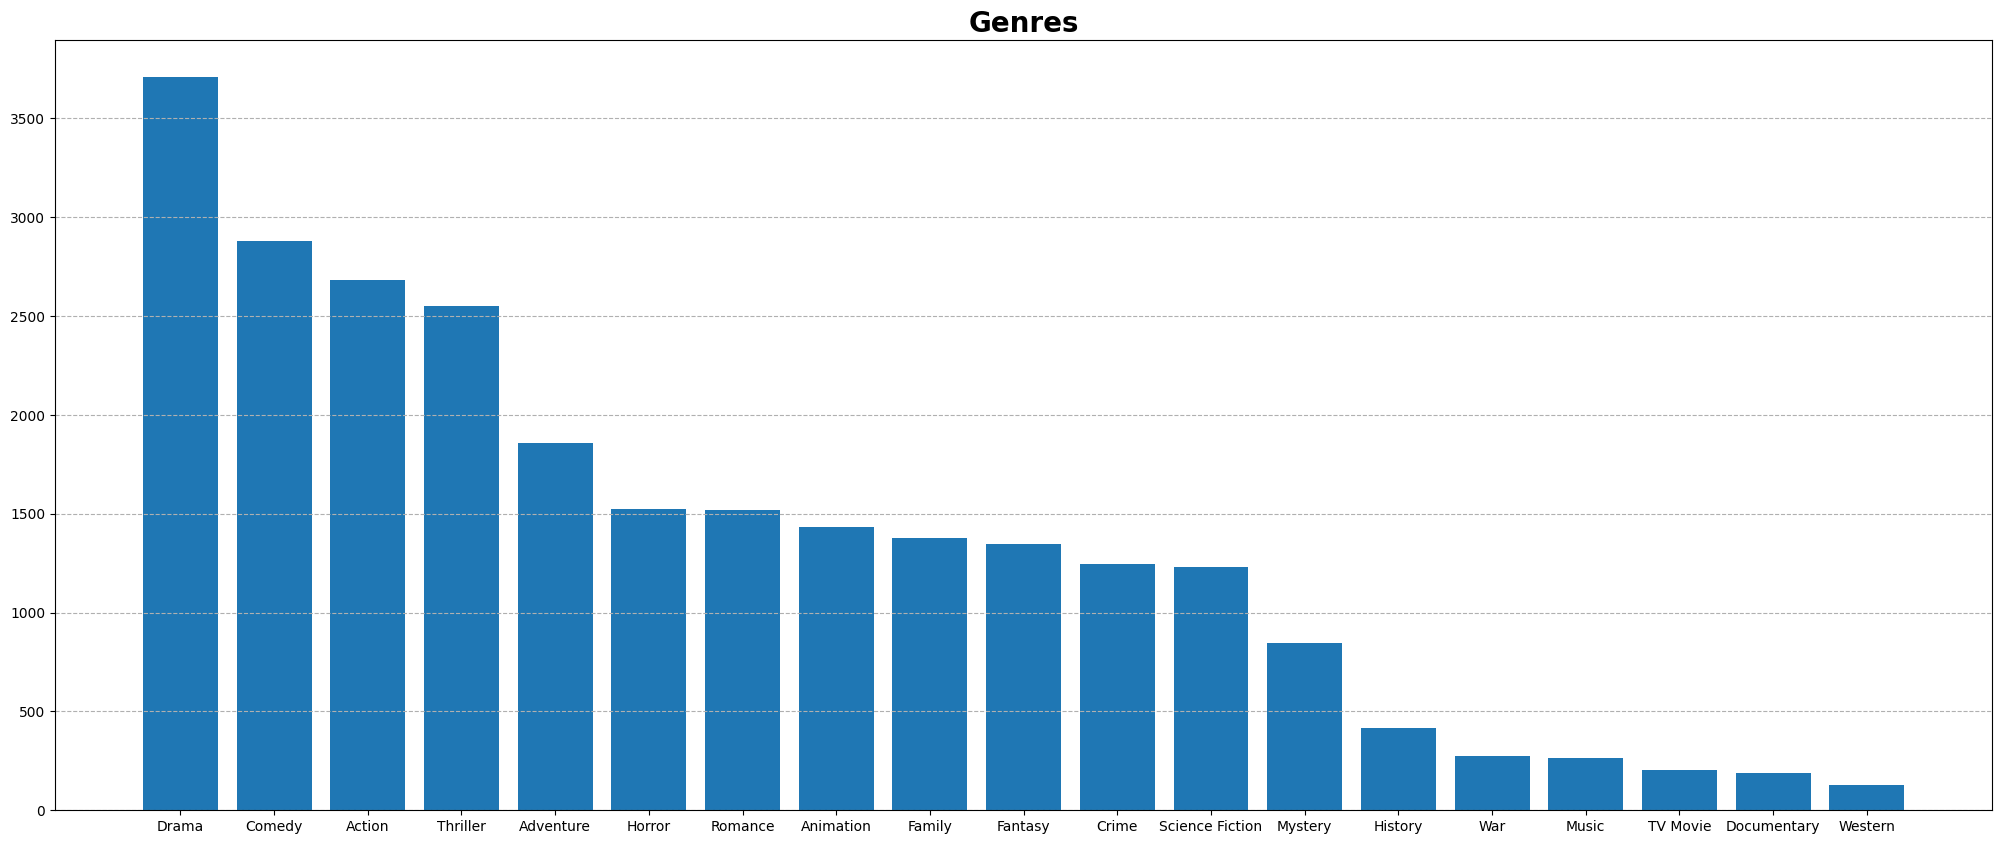

In [15]:
imdb_genres = imdb_movies[['names', 'genre', 'score']]
imdb_genres['genre'] = imdb_genres['genre'].str.split(r',\s*')
imdb_genres = imdb_genres.explode('genre').reset_index(drop=True)
genre_counts = imdb_genres['genre'].value_counts()
plt.figure(figsize=(25,10))
plt.bar(genre_counts.index, genre_counts)
plt.title('Genres', fontsize=20, fontweight='bold')
plt.grid(axis='y', linestyle='--')
plt.show()

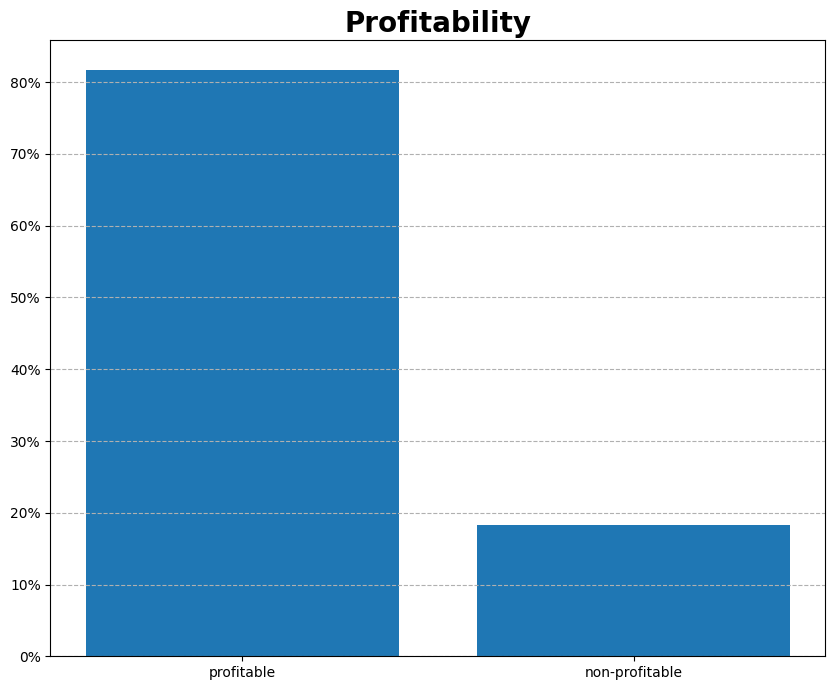

In [16]:
from matplotlib.ticker import PercentFormatter

profitability = imdb_movies.apply(lambda row: 'profitable' if row['revenue'] - row['budget'] > 0 else 'non-profitable', axis=1)
profitability = profitability.value_counts(normalize=True)
plt.figure(figsize=(10,8))
plt.bar(profitability.index, profitability)
plt.title('Profitability', fontsize=20, fontweight='bold')
plt.grid(axis='y', linestyle='--')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

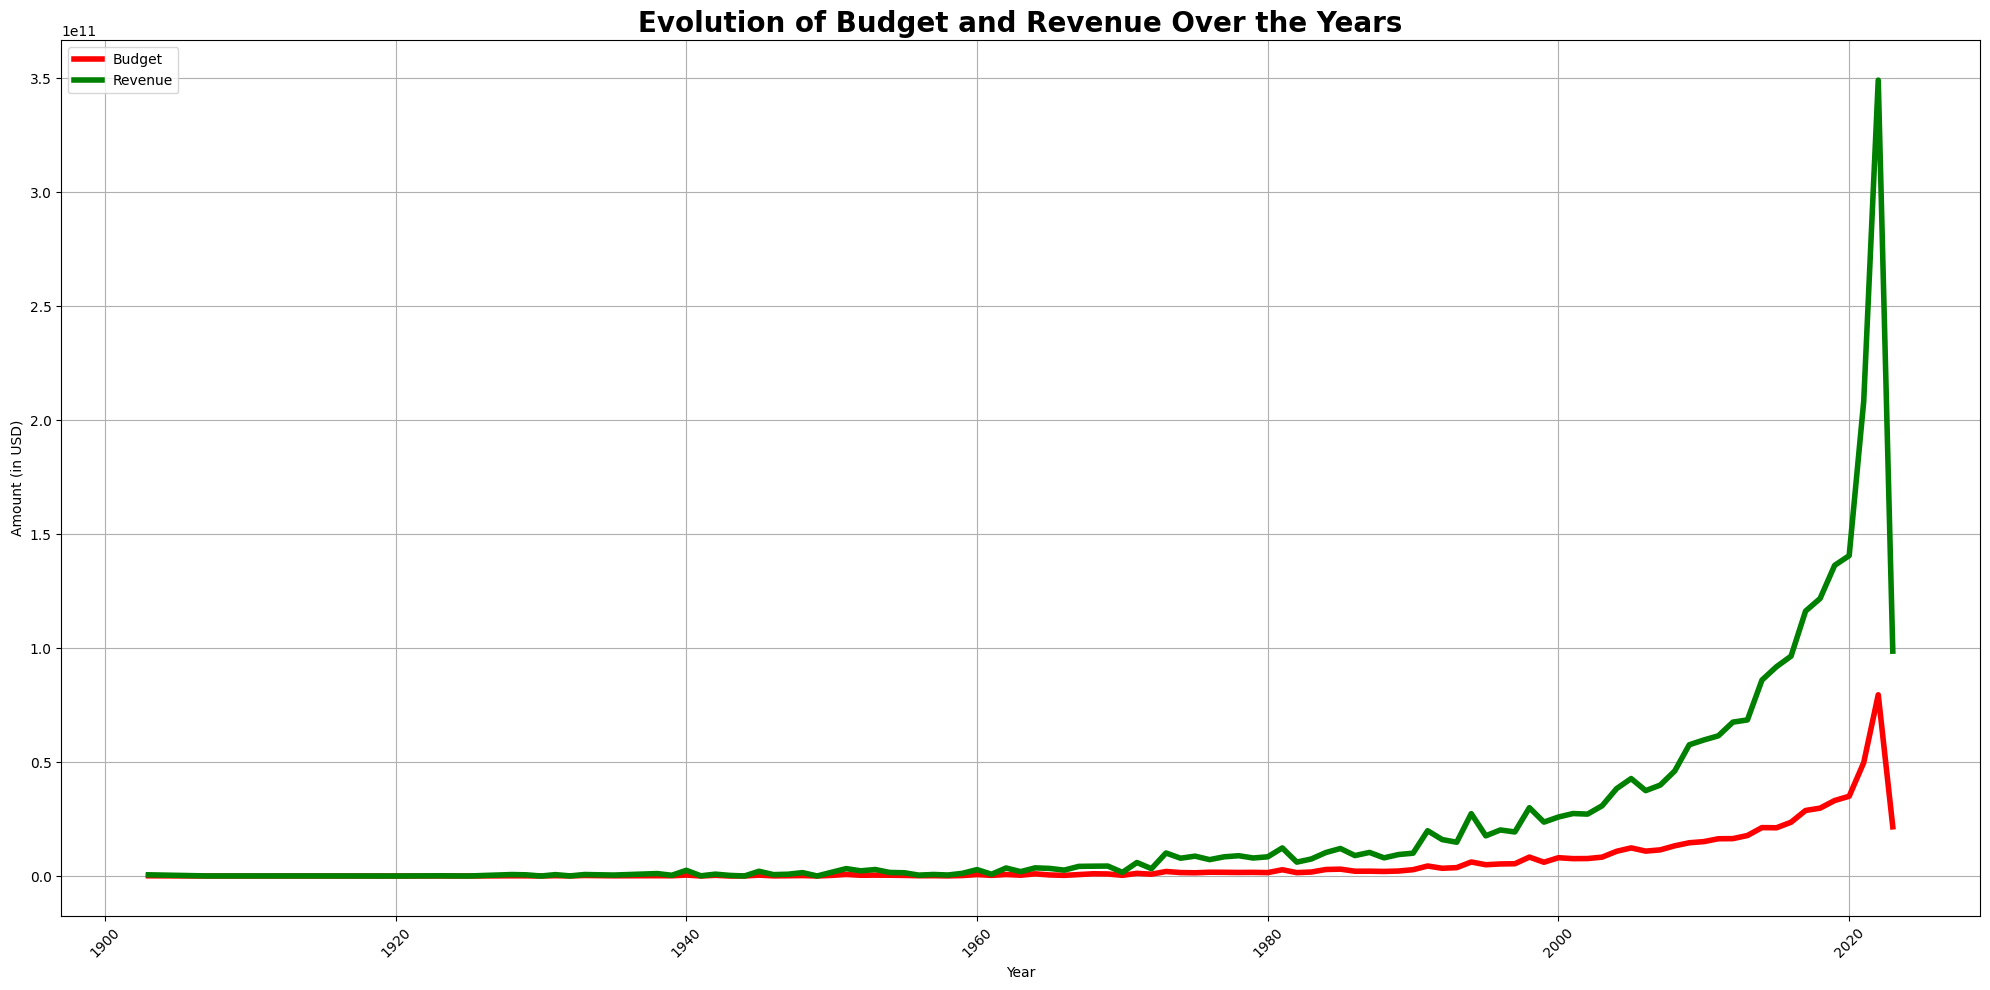

In [17]:
temp = imdb_movies.copy()
temp['year'] = pd.to_datetime(temp['release_date']).dt.year

yearly_data = temp.groupby('year')[['budget', 'revenue']].sum()

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(yearly_data.index, yearly_data['budget'], label='Budget', color='red', linewidth=4)
ax.plot(yearly_data.index, yearly_data['revenue'], label='Revenue', color='green', linewidth=4)

ax.set_title('Evolution of Budget and Revenue Over the Years', fontsize=20, fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Amount (in USD)')
plt.xticks(rotation=45)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The drop after 2020 is looking suspicious, so it is going to be analyzed

In [18]:
temp.groupby('year').count()

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,profitable
year,,,,,,,,,,,,,
1903,1,1,1,1,1,1,1,1,1,1,1,1,1
1907,1,1,1,1,1,1,1,1,1,1,1,1,1
1915,2,2,2,2,2,2,2,2,2,2,2,2,2
1920,1,1,1,1,1,1,1,1,1,1,1,1,1
1923,3,3,3,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,450,450,450,450,450,450,450,450,450,450,450,450,450
2020,435,435,435,435,435,435,435,435,435,435,435,435,435
2021,607,607,607,607,607,607,607,607,607,607,607,607,607


In [19]:
imdb_movies.sort_values('release_date', ascending=False)

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,profitable
1281,"La Usurpadora, the Musical",2023-12-31,90.0,"Music, Comedy, Drama","Two identical twin sisters, separated at birth...","Isabella Castillo, Valeria / Victoria, Alan Es...","La Usurpadora, El Musical",Released,"Spanish, Castilian",254000000.0,1.656280e+09,MX,1
9664,Simulant,2023-06-02,100.0,"Science Fiction, Thriller",Faye attempts to replace her newly deceased hu...,"Robbie Amell, Evan, Jordana Brewster, Faye, Si...",Hello Stranger,Released,English,201000000.0,1.569324e+09,US,1
518,Renfield,2023-05-25,83.0,"Comedy, Horror, Fantasy",Having grown sick and tired of his centuries a...,"Nicholas Hoult, R.M. Renfield, Nicolas Cage, C...",Renfield,Released,English,86203077.0,1.207640e+07,AU,0
1882,Infinity Pool,2023-05-11,65.0,"Horror, Science Fiction, Thriller","While staying at an isolated island resort, Ja...","Alexander Skarsgård, James Foster, Mia Goth, G...",Infinity Pool,Released,English,4500000.0,5.078400e+06,AU,1
779,November,2023-05-11,73.0,"Thriller, Crime, Drama","In November 2015, a series of unprecedented an...","Jean Dujardin, Fred, Anaïs Demoustier, Inès, S...",Novembre,Released,French,250000.0,1.918620e+05,AU,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7424,The Cabinet of Dr. Caligari,1920-02-27,80.0,"Drama, Horror, Thriller, Crime","Francis, a young man, recalls in his memory th...","Werner Krauß, Dr. Caligari, Conrad Veidt, Cesa...",Das Cabinet des Dr. Caligari,Released,German,18000.0,8.811000e+03,DE,0
9167,The Birth of a Nation,1915-02-08,61.0,"Drama, History, War","Two families, abolitionist Northerners the Sto...","Lillian Gish, Stoneman's Daughter Elsie, Mae M...",The Birth of a Nation,Released,English,10000000.0,1.689101e+07,US,1
9168,The Birth of a Nation,1915-02-08,61.0,"Drama, History, War","Two families, abolitionist Northerners the Sto...","Lillian Gish, Stoneman's Daughter Elsie, Mae M...",The Birth of a Nation,Released,English,110000.0,1.100000e+07,US,1
7146,A Trip to the Moon,1907-06-20,80.0,"Adventure, Science Fiction",Professor Barbenfouillis and five of his colle...,"Georges Méliès, Professor Barbenfouillis / The...",Le Voyage dans la Lune,Released,French,5985.0,3.996247e+07,AU,1


We have a drop in 2023 for total budget and revenue because our data finish with movies released in June 2023.
(Don't know why there's one released on 31-12-2023)

### Budget

In [20]:
imdb_movies['budget'].describe()

count    9.793000e+03
mean     6.243951e+07
std      5.421382e+07
min      2.000000e+03
25%      1.450000e+07
50%      5.000000e+07
75%      1.020000e+08
max      4.600000e+08
Name: budget, dtype: float64

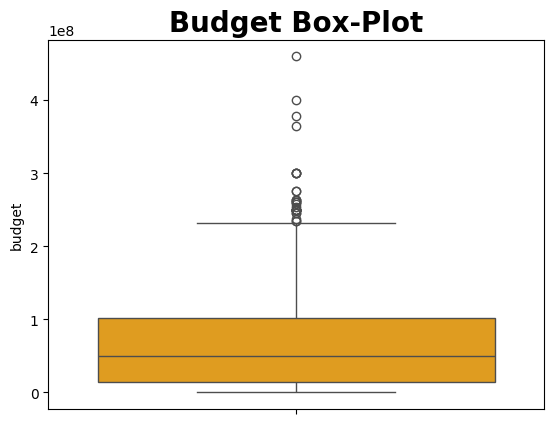

In [21]:
sns.boxplot(y=imdb_movies['budget'], color='orange')
plt.title('Budget Box-Plot', fontsize=20, fontweight='bold')
plt.show()


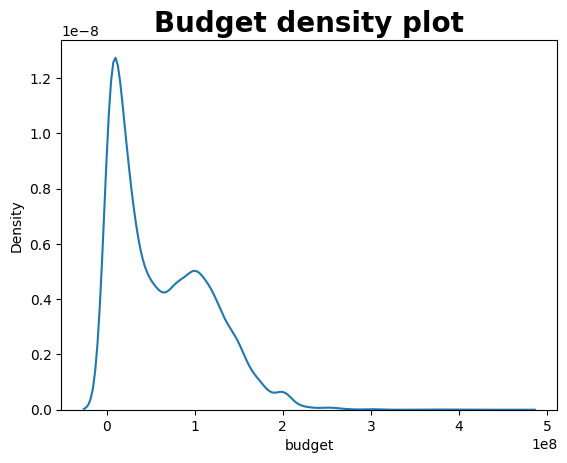

In [22]:
sns.kdeplot(imdb_movies['budget'])
plt.title('Budget density plot', fontsize=20, fontweight='bold')
plt.show()

In [23]:
# skewness

from scipy.stats import skew 
from scipy.stats import kurtosis 

print('skewness:', str(skew(imdb_movies['budget'], axis=0, bias=True)))
print('kurtosis:', str(kurtosis(imdb_movies['budget'], axis=0, bias=True)))

skewness: 0.831392632835075
kurtosis: 0.3804951052592074


Budget distribution is moderately right-skewed and platykurtic, so there is less extreme behavior in the tails.

### Score

In [24]:
imdb_movies['score'].describe()

count    9793.000000
mean       64.889717
std         9.884499
min        10.000000
25%        60.000000
50%        66.000000
75%        72.000000
max       100.000000
Name: score, dtype: float64

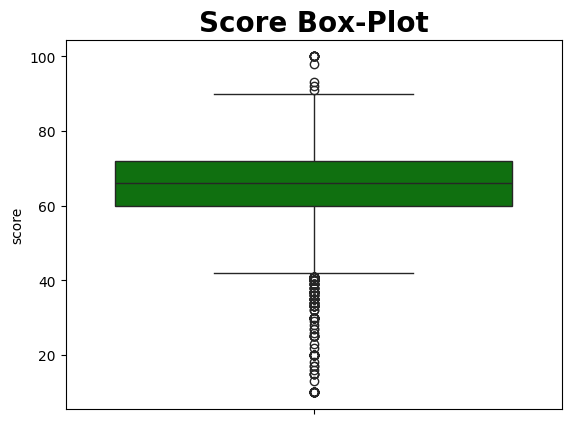

In [25]:
sns.boxplot(y=imdb_movies['score'], color='green')
plt.title('Score Box-Plot', fontsize=20, fontweight='bold')
plt.show()

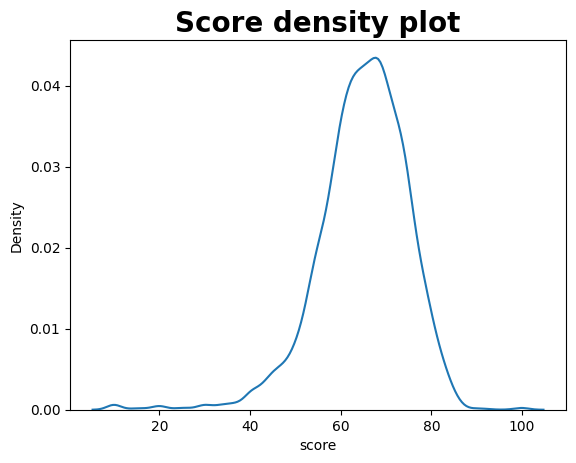

In [26]:
sns.kdeplot(imdb_movies['score'])
plt.title('Score density plot', fontsize=20, fontweight='bold')
plt.show()

In [27]:
# skewness

from scipy.stats import skew 
from scipy.stats import kurtosis 

print('skewness:', str(skew(imdb_movies['score'], axis=0, bias=True)))
print('kurtosis:', str(kurtosis(imdb_movies['score'], axis=0, bias=True)))

skewness: -1.0269619419574665
kurtosis: 3.406435353950447


Score distribution is moderately left-skewed and little leptokurtic, so there are some extreme values on either tail.

## Correlations Analysis

In [28]:
#grouping by genre and looking the max, min and mean values for each genre
imdb_genres.groupby('genre')['score'].agg(['max', 'min', 'mean'])

,max,min,mean
genre,,,
Action,85.0,23.0,64.489758
Adventure,85.0,15.0,65.874194
Animation,86.0,30.0,69.504530
Comedy,100.0,15.0,64.640180
Crime,90.0,25.0,65.827586
Documentary,93.0,20.0,68.930851
Drama,100.0,10.0,67.066307
Family,85.0,30.0,66.587509
Fantasy,86.0,15.0,66.395849


/var/folders/5x/yxh7qcrx4_x9ndr4nj2gddzc0000gn/T/ipykernel_16663/4253003052.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(genres_data_to_plot, labels=genres_list)


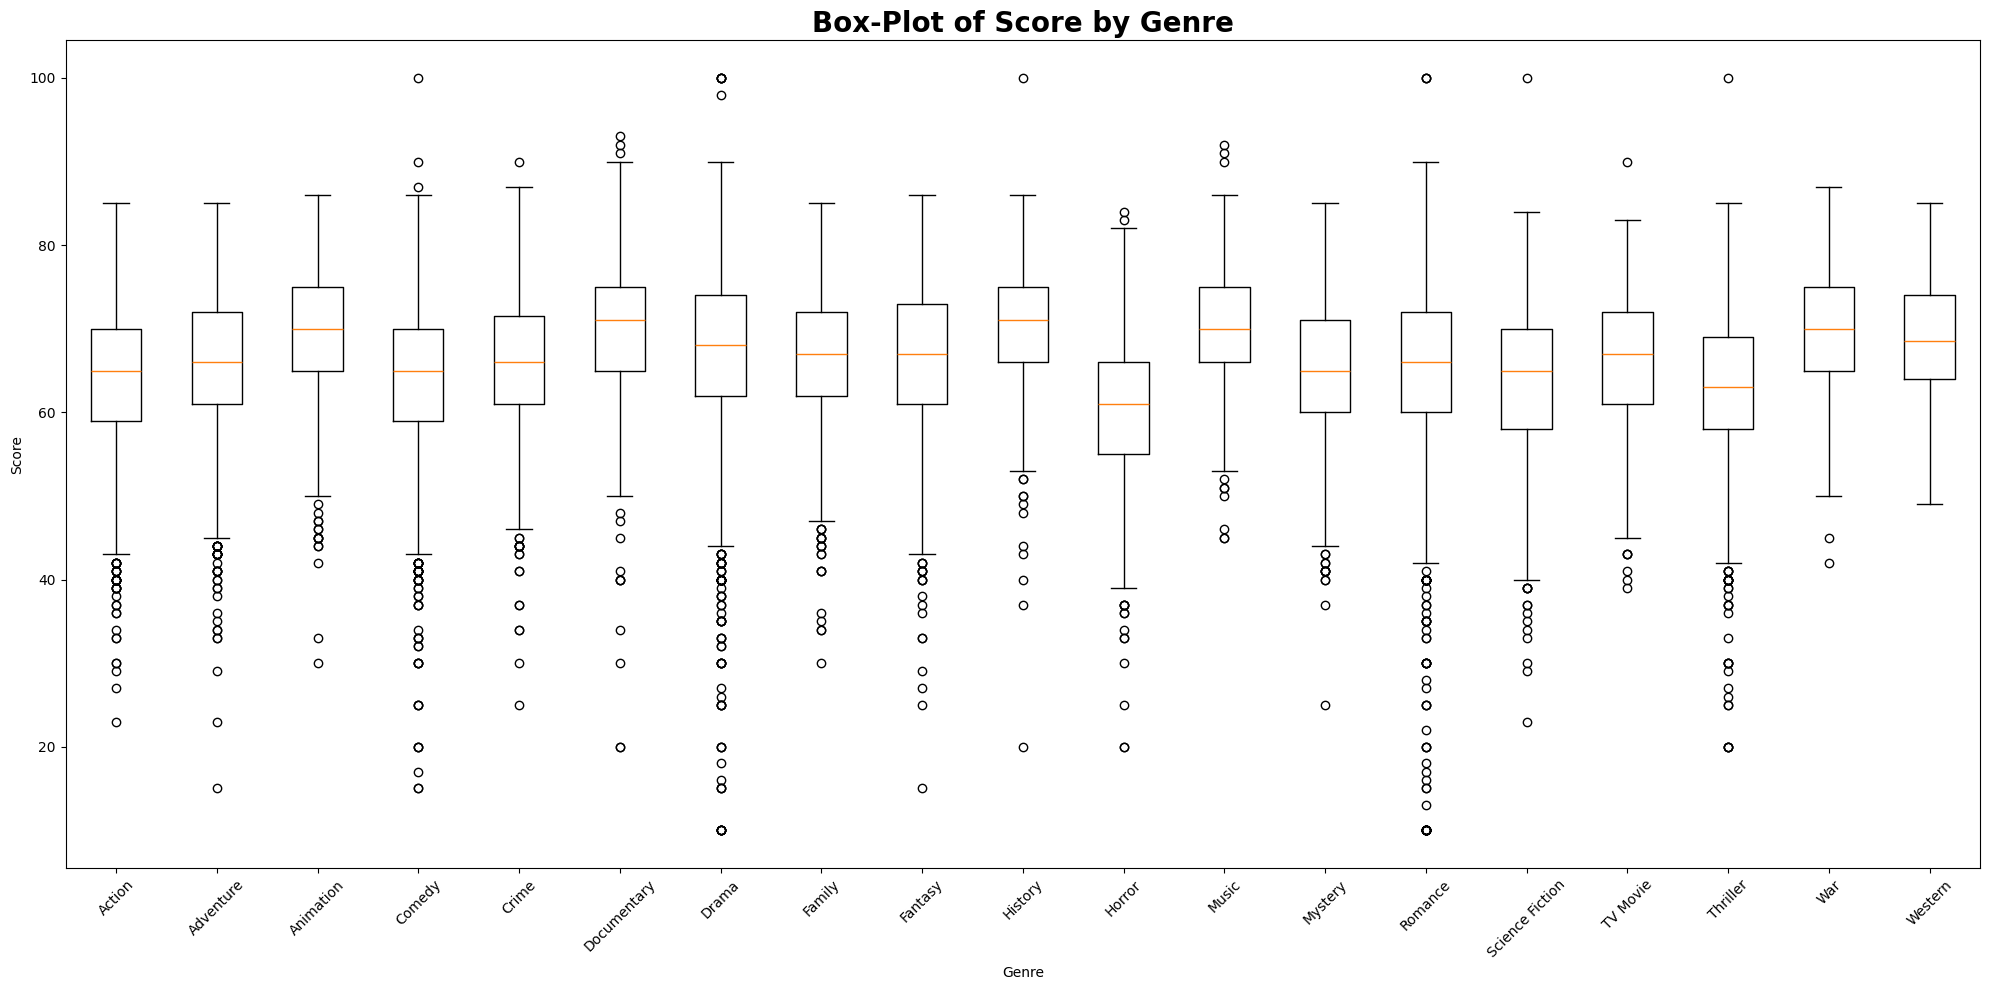

In [29]:

#boxplot 

#data preparation for boxplot
grouped_genres = imdb_genres.groupby('genre')['score'].apply(list) 
genres_list = grouped_genres.index.tolist()
genres_data_to_plot = [grouped_genres[genre] for genre in genres_list]

#boxplot preparation
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(genres_data_to_plot, labels=genres_list)
ax.set_xlabel('Genre')
ax.set_ylabel('Score')
plt.title('Box-Plot of Score by Genre', fontsize=20, fontweight='bold')
plt.xticks(rotation = 45)
plt.tight_layout()


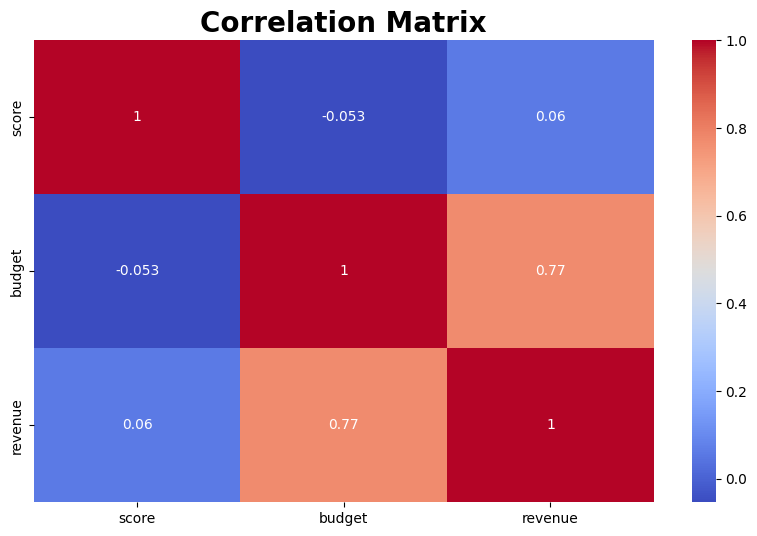

In [30]:
corr = imdb_movies[['score', 'budget','revenue']].corr(method='spearman')
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix',fontsize=20, fontweight='bold')
plt.show()


It is possible to see how the only relevant correlation is between budget and revenue

### Score and Budget

<Axes: xlabel='budget', ylabel='score'>

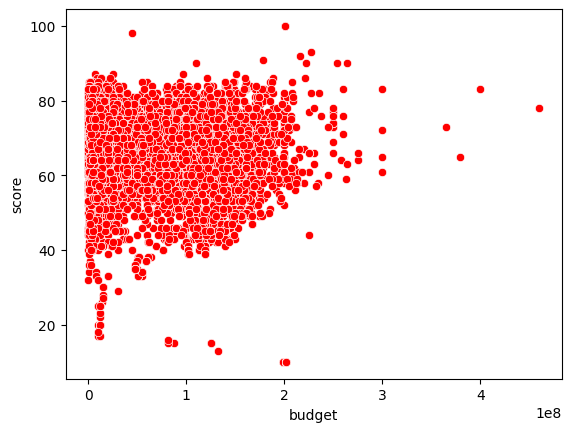

In [31]:
sns.scatterplot(y=imdb_movies['score'], x=imdb_movies['budget'], color='red')

In [32]:
imdb_movies[['budget', 'score']].cov()

,budget,score
budget,2.939138e+15,-2.420404e+07
score,-2.420404e+07,9.770332e+01


In [33]:
imdb_movies[['score', 'budget']].corr(method='pearson')

,score,budget
score,1.000000,-0.045167
budget,-0.045167,1.000000


In [34]:
imdb_movies[['score', 'budget']].corr(method='spearman')

,score,budget
score,1.000000,-0.053489
budget,-0.053489,1.000000


it seems we have a low correlation between the two variables

### Profitability and Score

In [35]:
stats.pointbiserialr(imdb_movies['profitable'], imdb_movies['score'])

SignificanceResult(statistic=np.float64(0.08166683224622479), pvalue=np.float64(5.763864722162707e-16))

<Axes: xlabel='score', ylabel='profitable'>

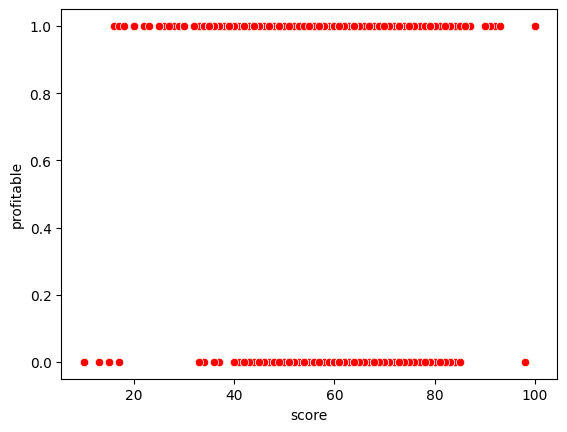

In [36]:
sns.scatterplot(y=imdb_movies['profitable'], x=imdb_movies['score'], color='red')

<Axes: xlabel='score', ylabel='Count'>

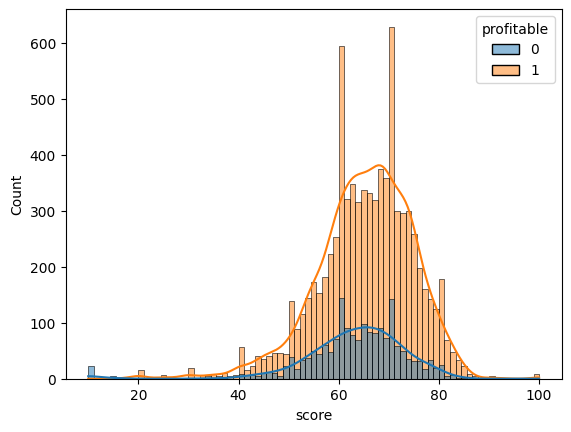

In [37]:
# histogram and density plots
sns.histplot(data=imdb_movies, x=imdb_movies['score'], hue=imdb_movies['profitable'], kde=True)

relatively weak positive correlation

generally, higher rated movies tend to break even more often

### Profitability and budget

In [38]:
stats.pointbiserialr(imdb_movies['profitable'], imdb_movies['budget'])

SignificanceResult(statistic=np.float64(0.2528129476139158), pvalue=np.float64(1.1979688152066442e-142))

<Axes: xlabel='budget', ylabel='profitable'>

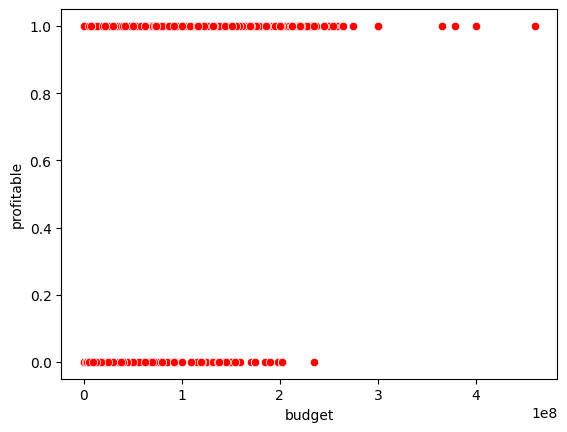

In [39]:
sns.scatterplot(y=imdb_movies['profitable'], x=imdb_movies['budget'], color='red')

<Axes: xlabel='budget', ylabel='Count'>

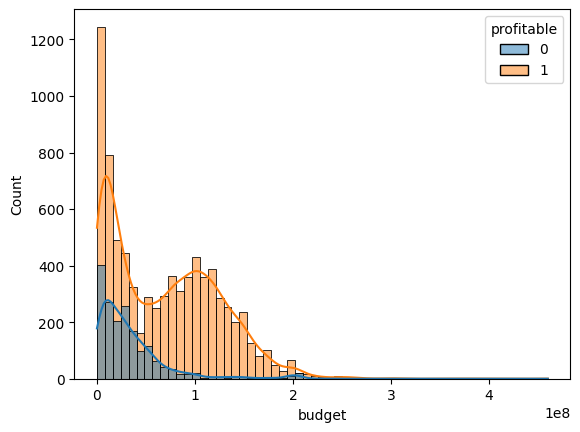

In [40]:
# histogram and density plots
sns.histplot(data=imdb_movies, x=imdb_movies['budget'], hue=imdb_movies['profitable'], kde=True)

relatively weak positive correlation

generally, passed the 50 milion budget, it is more probable to make a profitable movie

# Method 1

**Research Question 1**: is the IMDB score for a movie really not dependent on its production budget?

We will test the follwing hypothesis set:

- null hypothesis $H_0 : \beta_1 \gt 0$
- alternative hypothesis $H_1 : \beta_1 \leq 0$



## Regression Model 

we will start by fitting a linear regression model to our dataset \
the model can be expressed as:

$ \text{score} = \beta_0 + \beta_1 \cdot \text{budget} + \epsilon $


In [41]:

# Fit the linear regression model
model = smf.ols(formula='score ~ budget', data=imdb_movies)
results = model.fit()

# Display the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     20.02
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           7.77e-06
Time:                        12:28:37   Log-Likelihood:                -36321.
No. Observations:                9793   AIC:                         7.265e+04
Df Residuals:                    9791   BIC:                         7.266e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.4039      0.152    429.701      0.0

<u>**Interpretation of the results**</u>

**Coefficients:**
- Intercept: $\beta_0 = 65.4039$ \
    this suggests that, on average movies would have a score of roughly 65, when having no budget
- Budget: $\beta_1 = -8.235 \cdot 10^{-9}$ \
    this coefficient suggests that, for every addition dollar in budget, the movie scores decreases by $-8.235 \cdot 10^{-9}$ dollar, which is very close to 0

**p-value** $(P> |t|)$**:**
- For the budget coefficient, the p-value is 0.000. This means the relationship between budget and IMDb score is statistically significant at common significance levels (like 0.05 or 0.01), meaning that we can reject the null hypothesis that $\beta_1 \gt 0$
- A negative coefficient, combined with the small p-value, suggests that there is a significant negative relationship between budget and IMDb score.

**R-squared:** 
- The R-squared value is 0.002, which indicates that only 0.2% of the variation in IMDb scores is explained by the production budget. This is a very small proportion, meaning budget alone is not a good predictor of IMDb scores.

**F-statistic and Prob(F-statistics):**
- The F-statistic is $20.02$ with a corresponding p-value of $7.77 \cdot 10^{-6}$. This indicates that the model as a whole is statistically significant, though, given the low R-squared, this significance may not imply practical importance.

\
<u>**Additional considerations:**</u>

**Condition Number:** $1.26 \cdot 10^8$
- A high condition number may potentially indicate <u>multicollinarity</u> in the model.
- Let's procede with the check of the model's assumption...


## Checking model assumptions:

Let us procede to check our model's assumptions:


### Linearity

In [42]:
# making predictions
pred_insample = results.predict() # or results.fittedvalues

# out of sample prediction
pred_outofsample = results.predict(imdb_movies)


# add predictions to the data frame
imdb_movies['predictions'] = results.predict()
imdb_movies['residuals'] = results.resid # computing residuals (i.e., actual - predicted values)
imdb_movies.head()

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,profitable,predictions,residuals
0,Creed III,2023-03-02,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,1,64.786280,8.213720
1,Avatar: The Way of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,1,61.615774,16.384226
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,1,64.580403,11.419597
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,1,65.302620,4.697380
4,Supercell,2023-03-17,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,1,64.769810,-3.769810


Text(0.5, 1.0, 'Actual vs. Predicted')

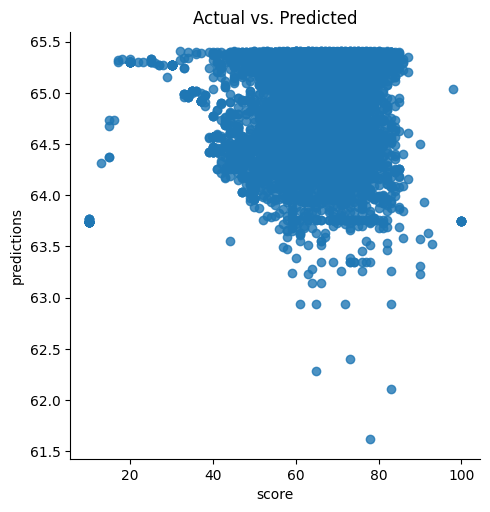

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
sns.lmplot(x = "score", y = "predictions", data = imdb_movies, fit_reg = False)        
plt.title("Actual vs. Predicted")

<u>**Interpretation:**</u>

The scatter plot above shows that the predictions from our linear regression model are clustered around a constant value (~65), with little variation in response to the actual IMDb scores. This indicates that the model is not capturing a meaningful relationship between the production budget and the IMDb score. 

**Conclusions**
- We can reject the null hypothesis based on the statistical significance of the budget coefficient.
- However, the model's poor predictive power (low R-squared) and near-constant predictions suggest that budget alone is not a strong predictor of IMDb scores.


### Homoscedacity

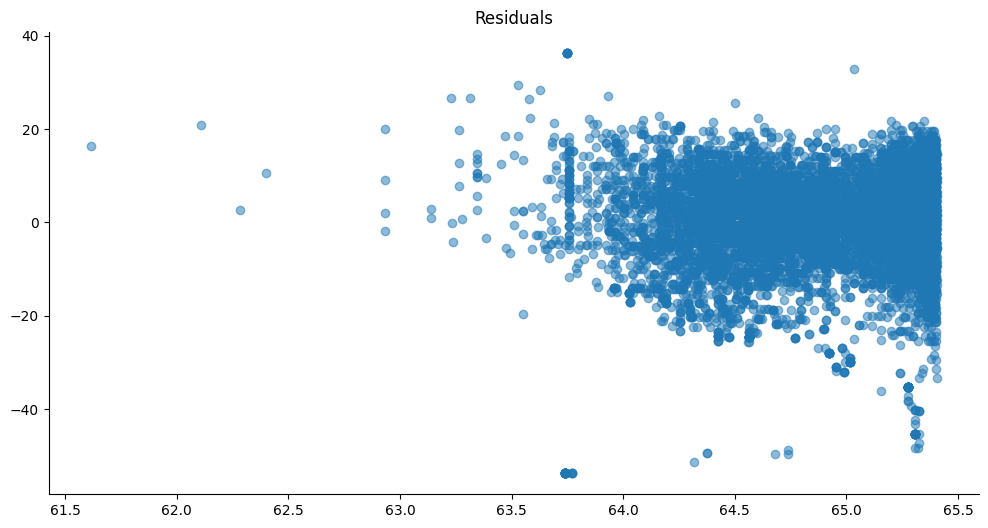

In [44]:
# Plotting the residuals
plt.subplots(figsize=(12, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x = imdb_movies.predictions, y = imdb_movies.residuals, alpha = 0.5)
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Residuals')
plt.show()

Interpretation:

#### Homoscedasticity robust errors

In [45]:
# Fit the linear regression model
model = smf.ols(formula= 'score ~ budget', data = imdb_movies) # using heteroscedasticity robust standard errors
results = model.fit(cov_type = "HC3")

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     12.61
Date:                Sat, 12 Oct 2024   Prob (F-statistic):           0.000385
Time:                        12:28:39   Log-Likelihood:                -36321.
No. Observations:                9793   AIC:                         7.265e+04
Df Residuals:                    9791   BIC:                         7.266e+04
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.4039      0.160    407.534      0.0

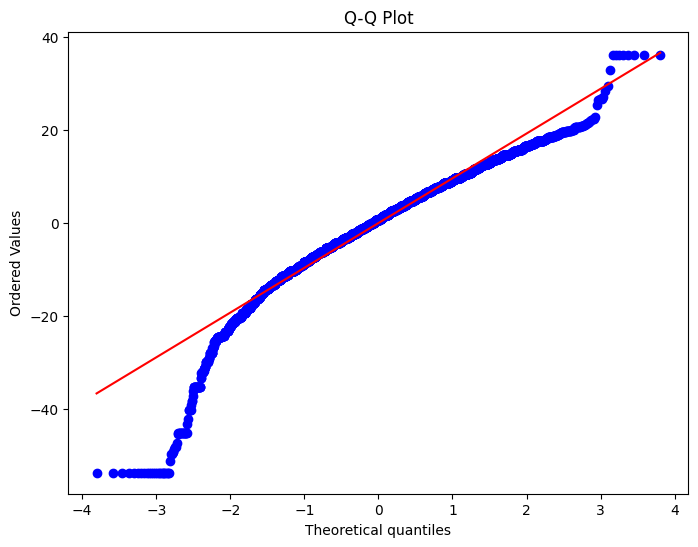

In [46]:
import scipy.stats as stats

# Q-Q plot for normality
plt.figure(figsize=(8,6))
stats.probplot(imdb_movies['residuals'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

In [47]:
# INSTRUCTION: Compute the VIF for all variables in the model

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe of independent variables
X = results.model.exog  # independent variables from the regression model

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif["features"] = results.model.exog_names

print(vif)

   VIF Factor   features
0     2.32661  Intercept
1     1.00000     budget


Interpretation:

In [48]:
from statsmodels.stats.stattools import durbin_watson

# Perform the Durbin-Watson test
dw_test = durbin_watson(imdb_movies['residuals'])
print(f'Durbin-Watson Test: {dw_test}')

Durbin-Watson Test: 1.9426636988347077


# Method 2
does imdb score influence if a movie is profitable or not?

In [49]:
logit_model = smf.logit('profitable ~ score + budget', data= imdb_movies)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.431910
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             profitable   No. Observations:                 9793
Model:                          Logit   Df Residuals:                     9790
Method:                           MLE   Df Model:                            2
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                 0.09126
Time:                        12:28:39   Log-Likelihood:                -4229.7
converged:                       True   LL-Null:                       -4654.4
Covariance Type:            nonrobust   LLR p-value:                3.446e-185
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1145      0.183     -6.096      0.000      -1.473      -0.756
score          0.0278      0.

In [50]:
# resetting indexes of the dataframe
imdb_movies.reset_index()


# Replace NaN or None values with empty strings
imdb_movies['genre'] = imdb_movies['genre'].fillna('')

# Remove leading/trailing whitespaces
imdb_movies['genre'] = imdb_movies['genre'].str.strip()
imdb_movies['genre'] = imdb_movies['genre'].str.replace(r'\s+', ' ', regex=True)
imdb_movies['genre'] = imdb_movies['genre'].str.replace(r',\s*', ',', regex=True)
imdb_movies['genre'] = imdb_movies['genre'].str.replace(' ', '_')

# Split the 'genre' strings into lists
imdb_movies['genre'] = imdb_movies['genre'].str.split(',')

# Strip whitespace from each genre in the list
imdb_movies['genre'] = imdb_movies['genre'].apply(lambda genres: [genre.strip() for genre in genres if genre])



In [51]:
#creating dummy_variables 

mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(mlb.fit_transform(imdb_movies['genre']), columns=mlb.classes_, index=imdb_movies.index)
genre_dummies

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science_Fiction,TV_Movie,Thriller,War,Western
0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
9789,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9790,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
9791,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0


In [52]:
#concatenate with imdb_movies dataframe

imdb_movies = pd.concat([imdb_movies, genre_dummies], axis=1)
imdb_movies

,names,release_date,score,genre,overview,crew,orig_title,status,orig_lang,budget,...,History,Horror,Music,Mystery,Romance,Science_Fiction,TV_Movie,Thriller,War,Western
0,Creed III,2023-03-02,73.0,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,...,0,0,0,0,0,0,0,0,0,0
1,Avatar: The Way of Water,2022-12-15,78.0,"[Science_Fiction, Adventure, Action]",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,...,0,0,0,0,0,1,0,0,0,0
2,The Super Mario Bros. Movie,2023-04-05,76.0,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,...,0,0,0,0,0,0,0,0,0,0
3,Mummies,2023-01-05,70.0,"[Animation, Comedy, Family, Adventure, Fantasy]","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,...,0,0,0,0,0,0,0,0,0,0
4,Supercell,2023-03-17,61.0,[Action],Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9788,20th Century Women,2016-12-28,73.0,[Drama],"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,...,0,0,0,0,0,0,0,0,0,0
9789,Delta Force 2: The Colombian Connection,1990-08-24,54.0,[Action],When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,...,0,0,0,0,0,0,0,0,0,0
9790,The Russia House,1990-12-21,61.0,"[Drama, Thriller, Romance]","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,...,0,0,0,0,1,0,0,1,0,0
9791,Darkman II: The Return of Durant,1995-07-11,55.0,"[Action, Adventure, Science_Fiction, Thriller,...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,...,0,1,0,0,0,1,0,1,0,0


In [53]:
genre_dummies.columns[1:]

Index(['Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance',
       'Science_Fiction', 'TV_Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [54]:
# iteractively ccreating the formula string to use for the regression model
regression_formula_string = 'budget ~'
regression_formula_string = regression_formula_string + f" {genre_dummies.columns[0]}"
for genre in genre_dummies.columns[2:]:
    regression_formula_string += f" + {genre}"

print(f"reference Category: {genre_dummies.columns[1]}")
regression_formula_string

reference Category: Adventure


'budget ~ Action + Animation + Comedy + Crime + Documentary + Drama + Family + Fantasy + History + Horror + Music + Mystery + Romance + Science_Fiction + TV_Movie + Thriller + War + Western'

In [55]:
logit_model = smf.logit('profitable ~ score + budget + Action + Animation + Comedy + Crime + Documentary + Drama + Family + Fantasy + History + Horror + Music + Mystery + Romance + Science_Fiction + TV_Movie + Thriller + War + Western', data= imdb_movies)
results = logit_model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.419216
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             profitable   No. Observations:                 9793
Model:                          Logit   Df Residuals:                     9772
Method:                           MLE   Df Model:                           20
Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                  0.1180
Time:                        12:28:40   Log-Likelihood:                -4105.4
converged:                       True   LL-Null:                       -4654.4
Covariance Type:            nonrobust   LLR p-value:                4.499e-220
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.4448      0.209     -6.916      0.000      -1.854      -1.035
score         

# Conclusion

# maybe add somewhere else

does genre influence the budget?